In [1]:
import matplotlib.pyplot as plt
 
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, confusion_matrix
 
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np

In [35]:
%matplotlib inline
plt.style.use('dark_background')

# 1. Keras NN  example

In [3]:
%%time

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
 
# Taking the first 60,000 observations as the training set
X_train = X[:60000]/255
y_train = y[:60000].astype(np.int64)
X_test  = X[60000:]/255
y_test  = y[60000:].astype(np.int64)

CPU times: total: 2min 22s
Wall time: 2min 25s


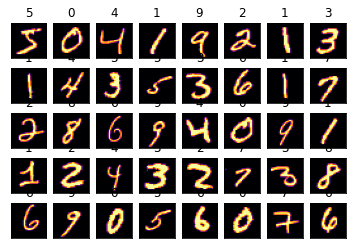

In [13]:
# visualise

n_rows = 5
n_cols = 8
 
fig, axarr = plt.subplots(n_rows, n_cols)

for i in range(n_rows * n_cols):
    
    # Plot the image
    curr_ax = axarr.ravel()[i]
    curr_ax.imshow(X.to_numpy()[i].reshape(28,28), cmap='inferno')
 
    # Turn off x and y ticks
    curr_ax.set_xticks([])
    curr_ax.set_yticks([])
 
    # Set label as titles
    curr_ax.set_title(y[i])

## NN Training

There are 3 main ingredients that we need:

- the model: definition
- loss: compilation
- optimiser: compilaton

we can also specify our metrics.

In [14]:
model = keras.Sequential(
    [
        keras.layers.Dense(30, activation='relu'),
        keras.layers.Dense(10, activation='softmax'),
    ]
)

In [15]:
model.compile(
    optimizer='sgd', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [16]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7042 - accuracy: 0.8154
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3511 - accuracy: 0.9018
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3033 - accuracy: 0.9142
Epoch 4/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2767 - accuracy: 0.9215
Epoch 5/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2584 - accuracy: 0.9269
Epoch 6/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2439 - accuracy: 0.9312
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2321 - accuracy: 0.9349
Epoch 8/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2221 - accuracy: 0.9374
Epoch 9/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2133 - accuracy: 0.9399
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.205

In [18]:
y_hat_test = model.predict(X_test)
print(f'Prediction data shape: {y_hat_test.shape}')

313/313 [==============================] - 1s 2ms/step
Prediction data shape: (10000, 10)


In [21]:
res = model.evaluate(X_test, y_test) # gets loss and accuracy

print(f'Loss:\t\t{res[0]}')
print(f'Accuracy:\t{res[1]}')

313/313 [==============================] - 1s 4ms/step - loss: 0.1762 - accuracy: 0.9494
Loss:		0.17620758712291718
Accuracy:	0.949400007724762


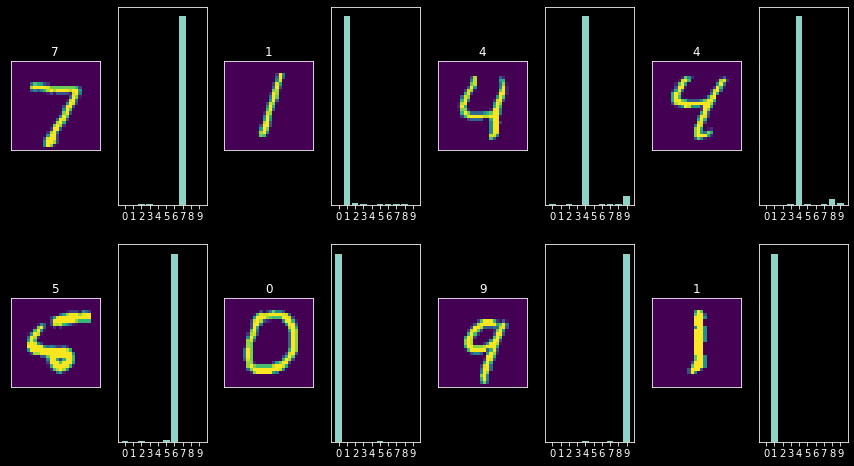

In [36]:
# visualise

n_rows = 2
n_cols = 8

fig, ax = plt.subplots(n_rows, n_cols, figsize=(15,8))
ax = ax.ravel()

for i in np.arange(0, len(ax), 2):
    
    #set up axes
    obs_index = i
    ax_image = ax[i]
    ax_pred = ax[i+1]
    
    #set up plots
    ax_image.imshow(X_test.to_numpy()[obs_index].reshape(28,28))
    ax_pred.bar(range(10), y_hat_test[obs_index])
    
    #remove ticks
    ax_pred.set_xticks(range(10))
    ax_pred.set_yticks([])
    ax_image.set_xticks([])
    ax_image.set_yticks([])
    
    #set title
    ax_image.set_title(y_test.to_numpy()[obs_index])

In [40]:
%%time

# fetching fashion data

X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)

X_train = X[:60000]
y_train = y[:60000].astype(np.int64)
X_test  = X[60000:]
y_test  = y[60000:].astype(np.int64)

CPU times: total: 2min 46s
Wall time: 2min 47s


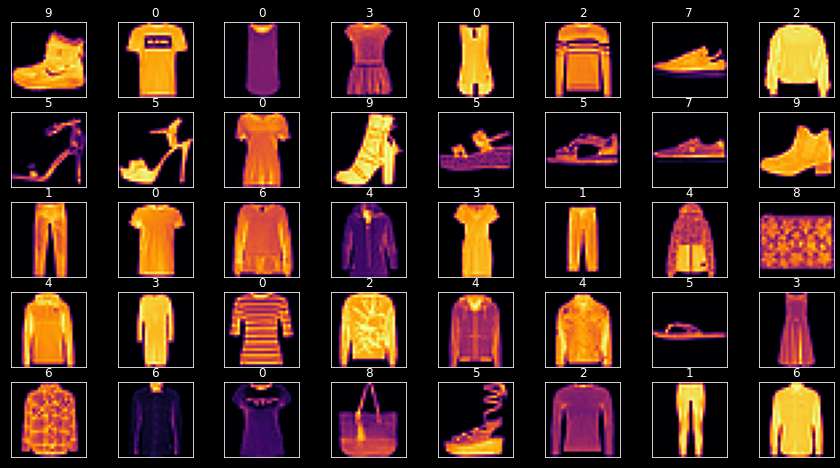

In [39]:
# plot

n_rows = 5
n_cols = 8

fig, axarr = plt.subplots(n_rows, n_cols, figsize=(15,8))

for i in range(n_rows * n_cols):
    # Plot the image
    curr_ax = axarr.ravel()[i]
    curr_ax.imshow(X.to_numpy()[i].reshape(28,28), cmap='inferno')
 
    # Turn off x and y ticks
    curr_ax.set_xticks([])
    curr_ax.set_yticks([])
 
    # Set label as titles
    curr_ax.set_title(y[i])

# 2. Numpy Logistic Regression

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.append(os.path.join(os.path.abspath('.'), 'data'))
import deep_learning.two_clusters as two_clusters

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

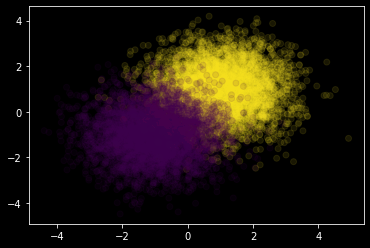

In [45]:
data_train = two_clusters.get_data(N=5000)
data_test  = two_clusters.get_data(N=5000)

# Splitting into test/train sets
X_train = data_train[['x1','x2']].values
y_train = data_train['y'].values.reshape(-1,1)
X_test  = data_test[['x1','x2']].values
y_test  = data_test['y'].values.reshape(-1,1)

# Plotting the data
fig, ax = plt.subplots()
ax.scatter(data_train['x1'], data_train['x2'], c=data_train['y'], alpha=0.1)


In [46]:
# benchmark

model = LogisticRegression(C=1e20)
model.fit(X_train, y_train)

print('model.coef_     :', model.coef_)
print('model.intercept_:', model.intercept_)

acc_test_sklearn = accuracy_score(y_test, model.predict(X_test))
print('accuracy (sklearn): ', acc_test_sklearn)


model.coef_     : [[2.04021748 1.95846221]]
model.intercept_: [0.02107015]
accuracy (sklearn):  0.9167


C:\Users\Dell5520\PycharmProjects\personal\machine_learning\venv\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
# manual

def sigmoid(z):
    return 1/(1+np.exp(-z))

# Define loss function
def logloss(y, y_hat):
    losses = -(
        y * np.log(y_hat) + (1 - y) * np.log((1 - y_hat))
    )
    cost = np.mean(losses, axis=0)[0]
    return cost

In [48]:
# params

lr = 1e-2 # learning rate
n_epochs = 100 # iterations/epochs
W = np.zeros((X_train.shape[1],1)) # weights
b = np.zeros((1,1)) # bias

In [51]:
# train

for i in range(n_epochs):

    Z  = np.matmul(X_train, W) + b
    A  = sigmoid(Z)
    dW = np.mean((A - y_train) * X_train, axis=0, keepdims=True).T
    db = np.mean((A - y_train), axis=0, keepdims=True)

    # Update
    W = W - lr*dW
    b = b - lr*db 
    
    if i%10 == 0:
        print(logloss(y_train, A))

# Printing weights
print(f'\nW: ', W)
print('b: ', b)

0.33787538680174006
0.3323757163521839
0.3272422280870395
0.32243997420195
0.3179382616858958
0.3137100344329132
0.30973135793097656
0.30598098763143855
0.30244000587816133
0.29909151524856536

W:  [[0.71922868]
 [0.70561911]]
b:  [[0.0021238]]


In [52]:
# Training accuracy
y_hat      = sigmoid(np.matmul(X_train, W) + b)
y_hat_hard = (y_hat > 0.5).astype(int)
acc_train  = accuracy_score(y_train, y_hat_hard)
print('accuracy (train): ', acc_train)

# Test accuracy
y_hat_test      = sigmoid(np.matmul(X_test, W) + b)
y_hat_hard_test = (y_hat_test > 0.5).astype(int)
acc_test        = accuracy_score(y_test, y_hat_hard_test)
print('accuracy (test): ', acc_test)

accuracy (train):  0.9195
accuracy (test):  0.9171
